### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
m = np.arange(12).reshape((3,4))
print(m)

print("overall mean: "+str(np.mean(m)))
print("row-whise mean: "+str([np.mean(m[r,:]) for r in range(m.shape[0])]))
print("column-whise mean: "+str([np.mean(m[:,c]) for c in range(m.shape[1])]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
overall mean: 5.5
row-whise mean: [1.5, 5.5, 9.5]
column-whise mean: [4.0, 5.0, 6.0, 7.0]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [31]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))

print(np.array([[a*b for a in u] for b in v]))

print(u.reshape(-1,1) * v.reshape(1,-1)) #turning them into 2D arrays so we can transpose them

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [44]:
m = np.random.rand(10,6)
#print(m)
mask = np.any(m < 0.1 ,1)
m[mask,:] = 0
print(m)

[[0.59063646 0.81643703 0.42431961 0.30419069 0.63925876 0.16384975]
 [0.69001466 0.58161071 0.10706718 0.27707081 0.21097038 0.69406193]
 [0.48094291 0.83726595 0.15773951 0.96284889 0.9101735  0.77889124]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53248411 0.43271818 0.78730519 0.14482602 0.4921617  0.95668023]
 [0.56755992 0.83543191 0.50343836 0.6569254  0.42526565 0.70602531]
 [0.87070194 0.41319529 0.70079387 0.39349803 0.53321905 0.8665634 ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.87343162 0.34644908 0.12028122 0.98144047 0.688781   0.48651747]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.2693

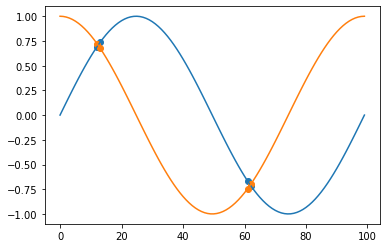

In [67]:
a = np.linspace(0, 2*np.pi, 100)
print(a[::10])
print(a[::-1])

ind = [i for i,v in enumerate(a) if abs(np.cos(v)-np.sin(v)) < 0.1] 
close = a[ind]
print(close)

plt.plot(np.sin(a))
plt.plot(np.cos(a))
plt.scatter(ind,np.sin(close))
plt.scatter(ind,np.cos(close))
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [95]:
x = np.arange(1,11,1)
m = np.outer(x,x)
print(m)

dx=[r for r in range(0,10)]
dy = 9*np.ones(10,np.int8)-dx
print(m[dx,dy])

print(np.diag(m,1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [102]:
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

dist_ml = abs(miles.reshape(-1,1) - miles.reshape(1,-1))
dist_km = np.around(dist_ml*1.61,1)
print(dist_km)

[[   0.   318.8  487.8 1185.  1402.3 1891.8 2374.8 2485.8 3079.9 3941.3]
 [ 318.8    0.   169.   866.2 1083.5 1573.  2056.  2167.1 2761.2 3622.5]
 [ 487.8  169.     0.   697.1  914.5 1403.9 1886.9 1998.  2592.1 3453.4]
 [1185.   866.2  697.1    0.   217.4  706.8 1189.8 1300.9 1895.  2756.3]
 [1402.3 1083.5  914.5  217.4    0.   489.4  972.4 1083.5 1677.6 2539. ]
 [1891.8 1573.  1403.9  706.8  489.4    0.   483.   594.1 1188.2 2049.5]
 [2374.8 2056.  1886.9 1189.8  972.4  483.     0.   111.1  705.2 1566.5]
 [2485.8 2167.1 1998.  1300.9 1083.5  594.1  111.1    0.   594.1 1455.4]
 [3079.9 2761.2 2592.1 1895.  1677.6 1188.2  705.2  594.1    0.   861.4]
 [3941.3 3622.5 3453.4 2756.3 2539.  2049.5 1566.5 1455.4  861.4    0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [148]:
def primes(n):
    mask = np.ones(n,dtype=bool)
    mask[0] = False
    mask[1] = False

    p = 2
    while p**2 < n:
        if mask[p]:
            mask[p**2:n:p] = False
        p += 1
        
    return np.array(range(n))[mask]

In [149]:
print(primes(99))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


In [152]:
%timeit primes(100)
%timeit primes(200)
%timeit primes(1000) #it does scale less than linearly with N

19 µs ± 964 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
27.5 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
123 µs ± 5.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

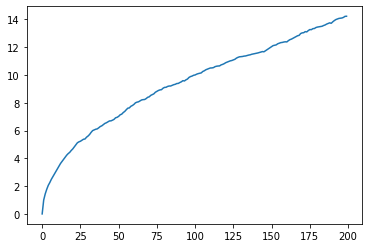

In [190]:
steps = np.random.randint(0,2,size=(1000,200))
steps = (-1)**steps

w = np.zeros((1000,200), np.int32)

for i in range(200):
    w[:,i] = np.sum(steps[:,:i], axis=1)

w2 = w*w
wm2 = np.mean(w2, axis=0)

plt.plot(np.sqrt(wm2))

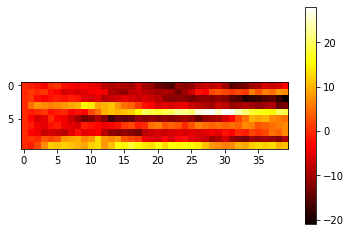

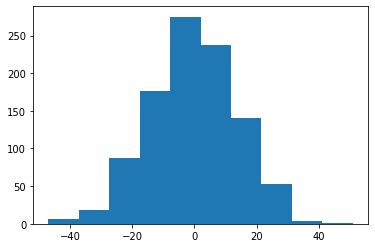

In [194]:
plt.imshow(w[:10,::5], cmap=plt.cm.hot)    
plt.colorbar() 
plt.show()

plt.hist(w[:,199])
plt.show()

The walkers are progressively getting further away from the starting location, as is to be expected. But as we see from the histogram the distibution of distances is still zero means, since the direction of the step is uniform.

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

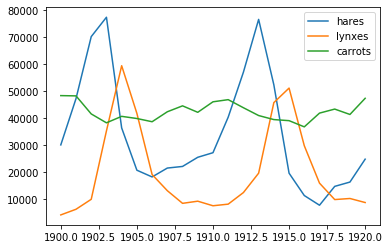

In [204]:
#wget doesn't work on windows so load file from local
l = np.loadtxt('populations.txt', np.int32)
year = l[:,0]
hares = l[:,1]
lynxes = l[:,2]
carrots = l[:,3]

plt.figure()
plt.plot(year, hares, label='hares')
plt.plot(year, lynxes, label='lynxes')
plt.plot(year, carrots, label='carrots')
plt.legend()
plt.show()

In [212]:
print("Hares statistics")
print("mean: ",np.mean(hares))
print("std: ",np.std(hares))
print("var: ",np.var(hares))
print("min: ",np.amin(hares))
print("max: ",np.amax(hares))

print("\nLynxes statistics")
print("mean: ",np.mean(lynxes))
print("std: ",np.std(lynxes))
print("var: ",np.var(lynxes))
print("min: ",np.amin(lynxes))
print("max: ",np.amax(lynxes))

print("\nCarrots statistics")
print("mean: ",np.mean(carrots))
print("std: ",np.std(carrots))
print("var: ",np.var(carrots))
print("min: ",np.amin(carrots))
print("max: ",np.amax(carrots))


Hares statistics
mean:  34080.95238095238
std:  20897.906458089667
var:  436722494.3310658
min:  7600
max:  77400

Lynxes statistics
mean:  20166.666666666668
std:  16254.591536908763
var:  264211746.031746
min:  4000
max:  59400

Carrots statistics
mean:  42400.0
std:  3322.5062255844787
var:  11039047.61904762
min:  36700
max:  48300


(21, 3)


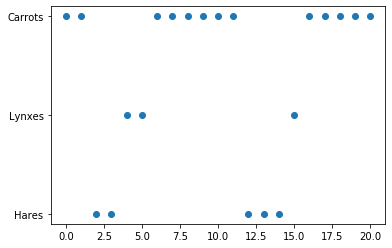

In [221]:
t = np.vstack((hares,lynxes,carrots)).T
print(t.shape)

yvalues = ['Hares','Lynxes','Carrots']
plt.yticks(np.array([0,1,2]), yvalues)
plt.plot(np.argmax(t,1),'o')
plt.title("Highest population each year")
plt.show()